In [1]:
import tqdm
import itertools

import datamol as dm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mood.constants import DOWNSTREAM_RESULTS_DIR
from mood.dataset import MOOD_DATASETS
from mood.representations import MOOD_REPRESENTATIONS
from mood.baselines import SUPPORTED_BASELINES
from mood.utils import get_outlier_bounds
from mood.metrics import Metric

/home/cas/local/conda/envs/mood_v2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
SUBDIR = "20221213"

In [3]:
in_dir = dm.fs.join(DOWNSTREAM_RESULTS_DIR, "dataframes", "compare_performance", SUBDIR)
pattern = dm.fs.join(in_dir, "gap_*.csv")
paths = dm.fs.glob(pattern)

In [4]:
def find_missing(paths, all_triplets):
    triplets = []
    for path in paths:
        path = dm.fs.get_basename(path)
        path = ".".join(path.split(".")[:-1])
        triplet = tuple(path.split("_")[1:])
        triplets.append(triplet)
    missing = set(all_triplets) - set(triplets)
    
    msg = f"Missing {len(missing)}:\n"
    for m in sorted(missing): 
        msg += f"{m}\n"
    return msg 
                        

all_triplets = list(itertools.product(MOOD_DATASETS, SUPPORTED_BASELINES, MOOD_REPRESENTATIONS))
assert list(all_triplets) == len(paths), find_missing(paths, all_triplets)

AssertionError: Missing 77:
('BBB', 'GP', 'ChemBERTa')
('BBB', 'GP', 'Desc2D')
('BBB', 'GP', 'ECFP6')
('BBB', 'GP', 'Graphormer')
('BBB', 'GP', 'MACCS')
('BBB', 'GP', 'WHIM')
('BBB', 'MLP', 'ChemBERTa')
('BBB', 'MLP', 'Desc2D')
('BBB', 'MLP', 'ECFP6')
('BBB', 'MLP', 'Graphormer')
('BBB', 'MLP', 'MACCS')
('BBB', 'MLP', 'WHIM')
('BBB', 'RF', 'ChemBERTa')
('BBB', 'RF', 'Desc2D')
('BBB', 'RF', 'ECFP6')
('BBB', 'RF', 'Graphormer')
('BBB', 'RF', 'MACCS')
('BBB', 'RF', 'WHIM')
('CYPP4502C9', 'GP', 'ChemBERTa')
('CYPP4502C9', 'GP', 'Desc2D')
('CYPP4502C9', 'GP', 'ECFP6')
('CYPP4502C9', 'GP', 'Graphormer')
('CYPP4502C9', 'GP', 'MACCS')
('CYPP4502C9', 'GP', 'WHIM')
('CYPP4502C9', 'MLP', 'ChemBERTa')
('CYPP4502C9', 'MLP', 'Desc2D')
('CYPP4502C9', 'MLP', 'ECFP6')
('CYPP4502C9', 'MLP', 'Graphormer')
('CYPP4502C9', 'MLP', 'MACCS')
('CYPP4502C9', 'MLP', 'WHIM')
('CYPP4502C9', 'RF', 'ChemBERTa')
('CYPP4502C9', 'RF', 'Desc2D')
('CYPP4502C9', 'RF', 'ECFP6')
('CYPP4502C9', 'RF', 'Graphormer')
('CYPP4502C9', 'RF', 'MACCS')
('CYPP4502C9', 'RF', 'WHIM')
('Caco-2', 'GP', 'ChemBERTa')
('Caco-2', 'GP', 'Desc2D')
('Caco-2', 'GP', 'ECFP6')
('Caco-2', 'GP', 'Graphormer')
('Caco-2', 'GP', 'MACCS')
('Caco-2', 'GP', 'WHIM')
('Caco-2', 'MLP', 'ChemBERTa')
('Caco-2', 'MLP', 'Desc2D')
('Caco-2', 'MLP', 'ECFP6')
('Caco-2', 'MLP', 'Graphormer')
('Caco-2', 'MLP', 'MACCS')
('Caco-2', 'MLP', 'WHIM')
('Caco-2', 'RF', 'ChemBERTa')
('Caco-2', 'RF', 'Desc2D')
('Caco-2', 'RF', 'ECFP6')
('Caco-2', 'RF', 'Graphormer')
('Caco-2', 'RF', 'MACCS')
('Caco-2', 'RF', 'WHIM')
('Lipophilicity', 'GP', 'ChemBERTa')
('Lipophilicity', 'GP', 'Desc2D')
('Lipophilicity', 'GP', 'ECFP6')
('Lipophilicity', 'GP', 'Graphormer')
('Lipophilicity', 'GP', 'MACCS')
('Lipophilicity', 'GP', 'WHIM')
('Lipophilicity', 'MLP', 'ChemBERTa')
('Lipophilicity', 'MLP', 'Desc2D')
('Lipophilicity', 'MLP', 'ECFP6')
('Lipophilicity', 'MLP', 'Graphormer')
('Lipophilicity', 'MLP', 'MACCS')
('Lipophilicity', 'MLP', 'WHIM')
('Lipophilicity', 'RF', 'ChemBERTa')
('Lipophilicity', 'RF', 'Desc2D')
('Lipophilicity', 'RF', 'ECFP6')
('Lipophilicity', 'RF', 'Graphormer')
('Lipophilicity', 'RF', 'MACCS')
('Lipophilicity', 'RF', 'WHIM')
('PPBR', 'GP', 'ChemBERTa')
('PPBR', 'GP', 'Graphormer')
('PPBR', 'MLP', 'ChemBERTa')
('PPBR', 'RF', 'ChemBERTa')
('PPBR', 'RF', 'Graphormer')


<div style="padding: 20px; background-color: #007bff; color: white;"><b>Note</b>: All triplets that are still missing, did not finish within 24h of training. </div>

In [5]:
df_original = pd.concat([pd.read_csv(p) for p in tqdm.tqdm(paths)], ignore_index=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:36<00:00,  3.32it/s]


In [6]:
df_original.head()

,dataset,algorithm,representation,iid_score,ood_score,metric,type
0,Clearance,GP,ChemBERTa,35.310654,35.864426,MAE,performance
1,Clearance,GP,ChemBERTa,0.034476,-0.006712,Spearman,calibration
2,Clearance,GP,Desc2D,36.760784,38.294033,MAE,performance
3,Clearance,GP,Desc2D,0.016551,-0.001955,Spearman,calibration
4,Clearance,GP,ECFP6,34.796375,38.179348,MAE,performance


In [8]:
df_original.groupby(["type", "metric"])[["iid_score", "ood_score"]].describe()

iid_score                                             \
                            count       mean        std       min        25%   
type        metric                                                             
calibration Brier score      72.0   0.375734   0.135111  0.075731   0.308072   
            Spearman         49.0   0.216021   0.211088 -0.215391   0.059941   
performance AUROC            72.0   0.715002   0.120930  0.479990   0.672369   
            MAE              49.0  24.009736  10.790685  8.399971  15.088448   

                                                         ood_score             \
                               50%        75%        max     count       mean   
type        metric                                                              
calibration Brier score   0.376307   0.474274   0.732969      72.0   0.386123   
            Spearman      0.141366   0.405093   0.673074      49.0   0.181635   
performance AUROC         0.730592   0.810209   0.886833      72.0   0.684952   
            MAE          21.737558  34.932575  40.307648      49.0  26.181962   

                                                                               \
                               std       min        25%        50%        75%   
type        metric                                                              
calibration Brier score   0.144125  0.078527   0.310358   0.382166   0.489821   
            Spearman      0.221587 -0.187380  -0.001955   0.171868   0.351702   
performance AUROC         0.106359  0.476090   0.637122   0.708581   0.759487   
            MAE          11.400037  9.070678  15.986262  25.956316  38.021461   

                                    
                               max  
type        metric                  
calibration Brier score   0.750291  
            Spearman      0.676177  
performance AUROC         0.875109  
            MAE          42.866581

In [9]:
# Make a copy to keep the original intact. 
# Useful for experimentation, as creating the dataframe can be slow
df = df_original.copy()

# Upscale the Spearman correlation to go from [-1, 1] to [0, 1]
df.loc[df["metric"] == "Spearman", "iid_score"] = (df["iid_score"] + 1) / 2
df.loc[df["metric"] == "Spearman", "ood_score"] = (df["ood_score"] + 1) / 2

# A gap > 0; performance on OOD set was better
# We expect: Performance to be worse (so: Negative gaps)
df["gap"] = df["ood_score"] - df["iid_score"]

# Since we observed above that there is no negative scores
# We can also compute the relative change
# This is useful as the range to values for all targets is not the same (e.g. PPBR vs. Caco-2)
df["relative_gap"] = (df["gap"] / df["iid_score"]) * 100

# Invert the gap of metrics that need to be minimized, so that a high gap is always better
df["metric_direction"] = df["metric"].apply(lambda x: Metric.by_name(x).mode)
df.loc[df["gap"] == "min", "gap"] = -df["gap"]
df.loc[df["metric_direction"] == "min", "relative_gap"] = -df["relative_gap"]

df = df.rename(columns={"representation": "Representation", "dataset": "Dataset"})
df.head()

,Dataset,algorithm,Representation,iid_score,ood_score,metric,type,gap,relative_gap,metric_direction
0,Clearance,GP,ChemBERTa,35.310654,35.864426,MAE,performance,0.553772,-1.568286,min
1,Clearance,GP,ChemBERTa,0.517238,0.496644,Spearman,calibration,-0.020594,-3.981512,max
2,Clearance,GP,Desc2D,36.760784,38.294033,MAE,performance,1.533249,-4.170882,min
3,Clearance,GP,Desc2D,0.508275,0.499022,Spearman,calibration,-0.009253,-1.820446,max
4,Clearance,GP,ECFP6,34.796375,38.179348,MAE,performance,3.382973,-9.722199,min


<AxesSubplot: xlabel='relative_gap', ylabel='type'>

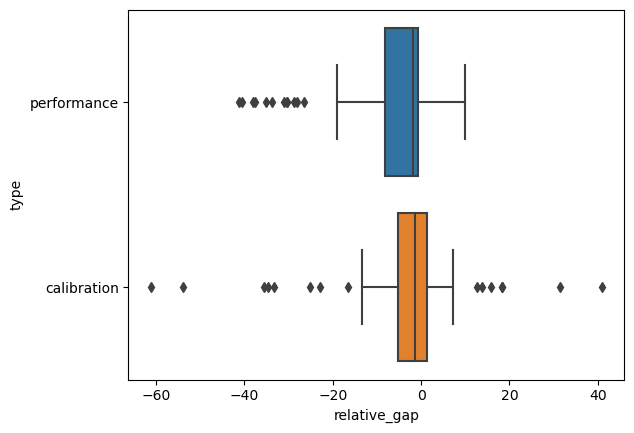

In [10]:
sns.boxplot(data=df, x="relative_gap", y="type")

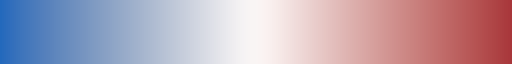

In [11]:
cmap = sns.color_palette("vlag", as_cmap=True)
cmap

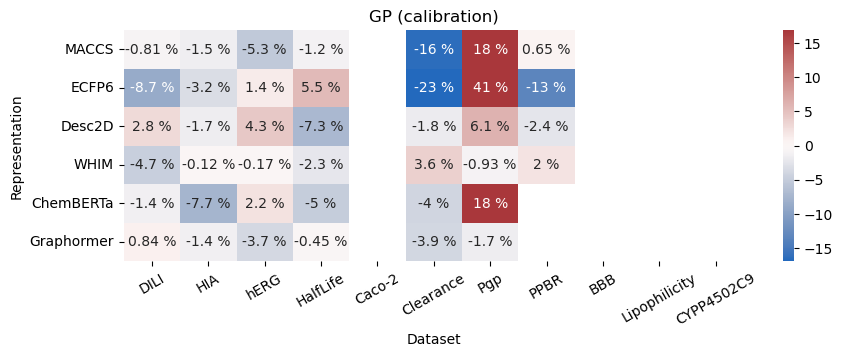

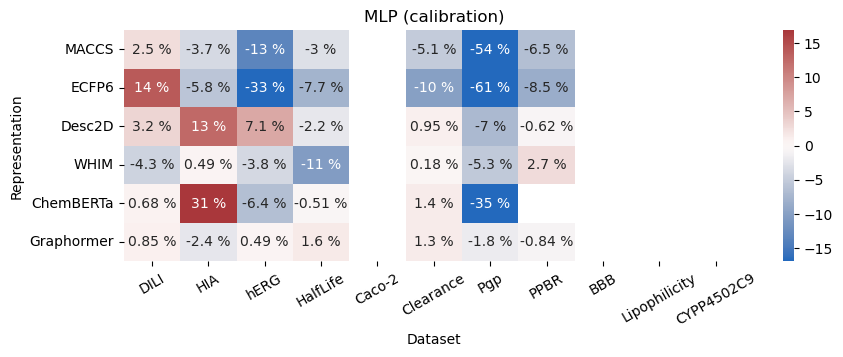

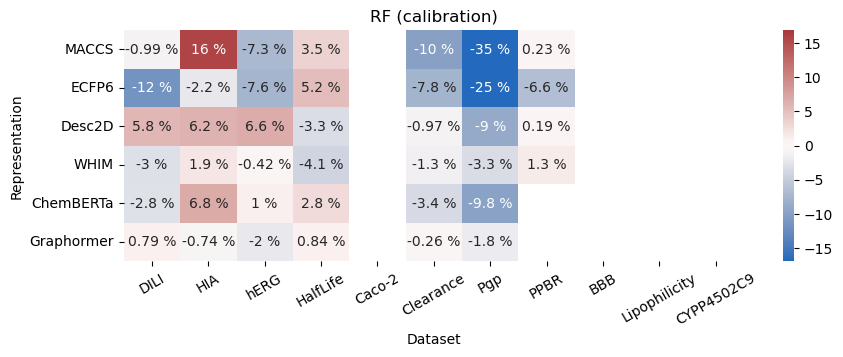

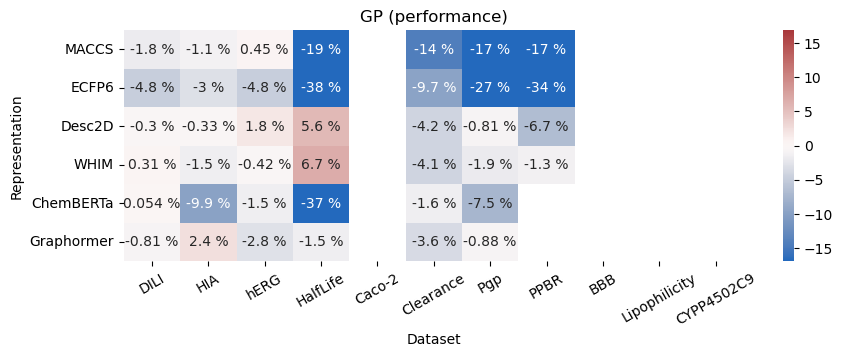

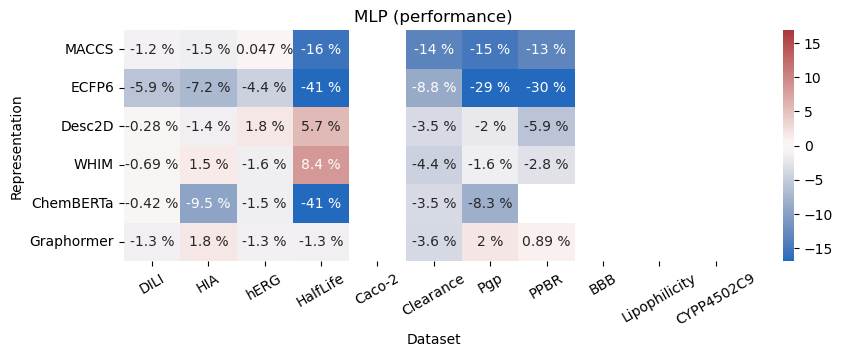

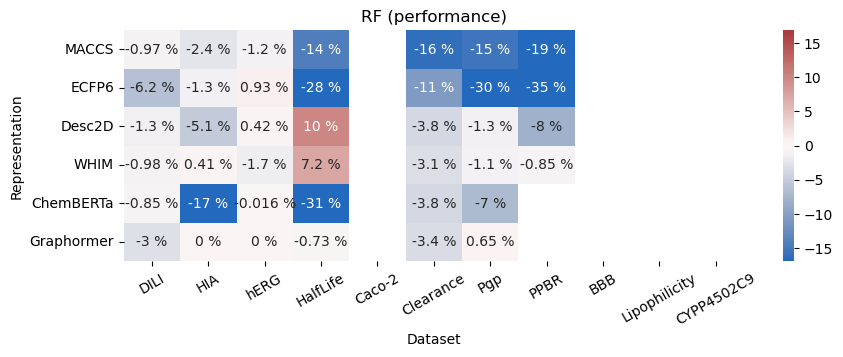

In [24]:
metric = "relative_gap"

lower, upper = get_outlier_bounds(df[metric].to_numpy())
vmin = min(lower, -upper)
vmax = -vmin

for metric_type, metric_group in df.groupby("type"):
        
    for idx, (name, group) in enumerate(metric_group.groupby("algorithm")):
        fig, ax = plt.subplots(figsize=(10, 3))
        pivot = group.pivot("Representation", "Dataset", metric)
        
        for c in MOOD_DATASETS: 
            if c not in pivot.columns:
                pivot[c] = np.nan
        pivot = pivot[MOOD_DATASETS]
        pivot = pivot.reindex(MOOD_REPRESENTATIONS)
        
        sns.heatmap(pivot, annot=True, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
        for t in ax.texts: t.set_text(t.get_text() + " %")
        ax.set_title(f"{name} ({metric_type})")

The End.